# MutClust Output analysis and occurrence matrix creation - Only TNBC - Only Hugo - q-value < 1

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import os
import sklearn

In [2]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/MutClust_output_definitivo")

REMEMBER: 
- from MutSig2CV I selected the genes with q-value < 1 
- in input to MutClust I just gave the Hugo symbols without the variant classifications

### Genes significantly mutated both in the Triple-Negative dataset (qval < 1)

In [3]:
# I run MutClust on the TOTAL DATASET intersected with the significant genes from MutSig2CV
df_mutclust_q1_TNandNONTN_onlyHugo = pd.read_csv('Output_onlyHugo_onlyTN_q1_definitivo.txt', delimiter='\t', engine='python')
df_mutclust_q1_TNandNONTN_onlyHugo

,Gene,Start,End,Scoresum,Recursion,Mutation,NES,Pvalue
0,TP53,270,282,0.085953,Y,78,13.231975,0.000000
1,TP53,191,199,0.079947,Y,65,12.007543,0.000000
2,TP53,236,258,0.077052,Y,94,11.417253,0.000000
3,TP53,173,177,0.061644,Y,47,8.275880,0.000000
4,TP53,211,218,0.030277,Y,32,1.880502,0.049505
...,...,...,...,...,...,...,...,...
389,ZKSCAN1,402,402,0.033938,N,1,-3.147024,0.990099
390,ZKSCAN1,436,436,0.033938,N,1,-3.147024,0.990099
391,ZKSCAN1,458,458,0.033938,N,1,-3.147024,0.990099
392,ZKSCAN1,511,511,0.033938,N,1,-3.147024,0.990099


In [4]:
# sort the dataframe by ascending order of Pvalue (from the most significant mutation to the least significant)
df_mutclust_q1_TNandNONTN_onlyHugo = df_mutclust_q1_TNandNONTN_onlyHugo.sort_values('Pvalue')
df_mutclust_q1_TNandNONTN_onlyHugo

,Gene,Start,End,Scoresum,Recursion,Mutation,NES,Pvalue
0,TP53,270,282,0.085953,Y,78,13.231975,0.000000
84,MAML3,503,503,0.388010,Y,7,6.054144,0.000000
336,MYL10,26,26,0.631939,Y,7,6.045801,0.000000
44,PIK3CA,102,113,0.037354,Y,26,8.067682,0.000000
42,PIK3CA,541,542,0.107077,Y,56,32.590886,0.000000
...,...,...,...,...,...,...,...,...
146,NOTCH2,476,476,0.027373,N,1,-2.611719,0.990099
145,NOTCH2,268,268,0.027373,N,1,-2.611719,0.990099
144,NOTCH2,217,217,0.027373,N,1,-2.611719,0.990099
216,RB1,873,873,0.027494,N,1,-2.691638,0.990099


**Relevant_cluster** : creates a dictionary containing values from 0.01 to 1 (with an interval of 0.01), in which each value is associated to the number of genes with p-value lower than the value itself.

In [5]:
# define a function that gives in output the number of relevant clusters at different p-values
def Relevant_cluster (df_mutclust):
    n_relevant_clusters = {}   
    for i in np.arange(0.01, 1, 0.01):
        n_relevant_clusters[i]=len(df_mutclust[df_mutclust.Pvalue<i]) 
    return (n_relevant_clusters)

In [6]:
n_relevant_clusters_mutclust_q1_TNandNONTN_onlyHugo = Relevant_cluster(df_mutclust_q1_TNandNONTN_onlyHugo)
n_relevant_clusters_mutclust_q1_TNandNONTN_onlyHugo

{0.01: 14,
 0.02: 16,
 0.03: 17,
 0.04: 18,
 0.05: 19,
 0.060000000000000005: 20,
 0.06999999999999999: 20,
 0.08: 20,
 0.09: 23,
 0.09999999999999999: 23,
 0.11: 23,
 0.12: 23,
 0.13: 23,
 0.14: 24,
 0.15000000000000002: 25,
 0.16: 25,
 0.17: 25,
 0.18000000000000002: 25,
 0.19: 26,
 0.2: 26,
 0.21000000000000002: 26,
 0.22: 26,
 0.23: 26,
 0.24000000000000002: 26,
 0.25: 27,
 0.26: 28,
 0.27: 28,
 0.28: 28,
 0.29000000000000004: 28,
 0.3: 28,
 0.31: 28,
 0.32: 28,
 0.33: 29,
 0.34: 30,
 0.35000000000000003: 30,
 0.36000000000000004: 30,
 0.37: 30,
 0.38: 30,
 0.39: 30,
 0.4: 30,
 0.41000000000000003: 30,
 0.42000000000000004: 30,
 0.43: 30,
 0.44: 31,
 0.45: 31,
 0.46: 31,
 0.47000000000000003: 31,
 0.48000000000000004: 31,
 0.49: 31,
 0.5: 31,
 0.51: 31,
 0.52: 31,
 0.53: 31,
 0.54: 31,
 0.55: 31,
 0.56: 32,
 0.5700000000000001: 32,
 0.5800000000000001: 32,
 0.59: 35,
 0.6: 35,
 0.61: 35,
 0.62: 35,
 0.63: 35,
 0.64: 35,
 0.65: 35,
 0.66: 35,
 0.67: 35,
 0.68: 36,
 0.690000000000000

In [7]:
# count how many clusters have p-value = 0 
len(df_mutclust_q1_TNandNONTN_onlyHugo.loc[df_mutclust_q1_TNandNONTN_onlyHugo['Pvalue'] == 0.000000])

14

In [8]:
# convert the dictionary into a Dataframe
df_n_relevant_clusters_mutclust_q1_TNandNONTN_onlyHugo = pd.DataFrame.from_dict(n_relevant_clusters_mutclust_q1_TNandNONTN_onlyHugo, orient='index')
df_n_relevant_clusters_mutclust_q1_TNandNONTN_onlyHugo.rename(columns={0: "Significant clusters"}, inplace=True)
df_n_relevant_clusters_mutclust_q1_TNandNONTN_onlyHugo.reset_index(level=0, inplace=True)
df_n_relevant_clusters_mutclust_q1_TNandNONTN_onlyHugo.rename(columns={"index": "P-value"}, inplace=True)
df_n_relevant_clusters_mutclust_q1_TNandNONTN_onlyHugo

,P-value,Significant clusters
0,0.01,14
1,0.02,16
2,0.03,17
3,0.04,18
4,0.05,19
...,...,...
94,0.95,48
95,0.96,50
96,0.97,52
97,0.98,56


### Plot the number of significant clusters as the p-value varies

Define a function to plot the number of significant clusters as the p-value varies.

In [9]:
def Grafico_Clusters_significativi_one_dataset(df_n_rel_clusters_mutclust, caso):
    casistica_titolo = 'Significant hotspots as the p-value varies - XXX'
    casistica_titolo = casistica_titolo.replace('XXX',caso)
    casistica_legenda = 'Significant hotspots determined by the XXX'
    casistica_legenda = casistica_legenda.replace('XXX', caso)
    
    df_n_rel_clusters_mutclust_copy = df_n_rel_clusters_mutclust.copy()
    df_n_rel_clusters_mutclust_copy = df_n_rel_clusters_mutclust_copy.set_index('P-value')
    
    plt.rcParams['figure.figsize'] = (10, 8)
    plt.plot(df_n_rel_clusters_mutclust_copy, label = casistica_legenda, color = 'red')
    plt.xlabel('P-value', fontsize=13)
    plt.ylabel('Number of significant hotspots', fontsize=13)
    plt.legend(loc='lower left', bbox_to_anchor=(0.0, -0.2), fontsize='large')
    plt.title(casistica_titolo,fontsize= 18)

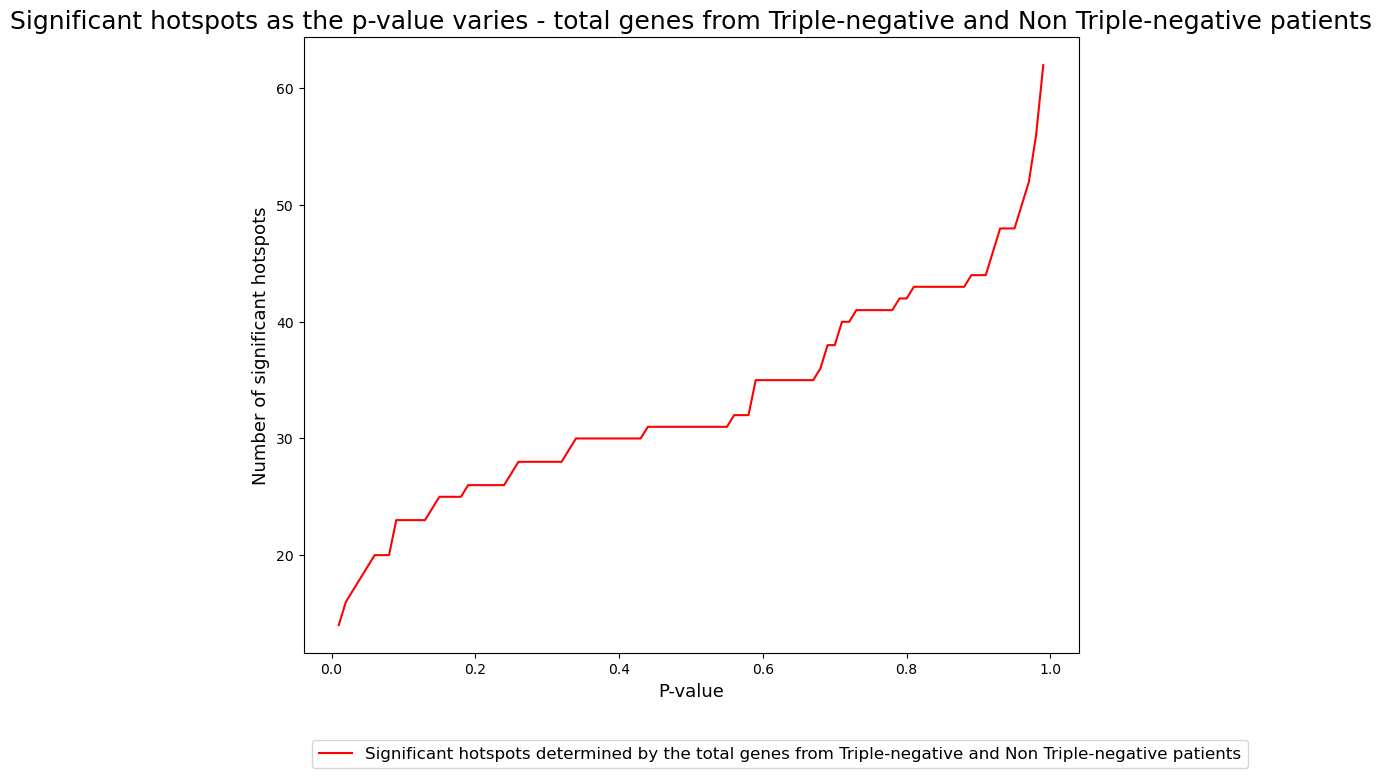

In [10]:
Grafico_Clusters_significativi_one_dataset(df_n_relevant_clusters_mutclust_q1_TNandNONTN_onlyHugo, 'total genes from Triple-negative and Non Triple-negative patients')

### Look at the clusters with a p-value < 0.05

**Freq_cluster**: this function takes as input the output of MutClust containing the clusters associated to a p-value and a specific p-value. The output is a subset of the original dataframe containing only the clusters with a p-value < seleceted p-value.

In [11]:
def Freq_cluster (df, val):
    freq_clusters = df[(df.Pvalue<val)]
    return (freq_clusters)

In [12]:
# Genes significantly mutated both in the Triple-Negative dataset and in the non Triple-Negative dataset (qval < 1)
freq_cluster_q1_TNandNONTN_onlyHugo = Freq_cluster(df_mutclust_q1_TNandNONTN_onlyHugo, 0.05)
freq_cluster_q1_TNandNONTN_onlyHugo = freq_cluster_q1_TNandNONTN_onlyHugo.reset_index(drop=True)
freq_cluster_q1_TNandNONTN_onlyHugo

,Gene,Start,End,Scoresum,Recursion,Mutation,NES,Pvalue
0,TP53,270,282,0.085953,Y,78,13.231975,0.000000
1,MAML3,503,503,0.388010,Y,7,6.054144,0.000000
2,MYL10,26,26,0.631939,Y,7,6.045801,0.000000
3,PIK3CA,102,113,0.037354,Y,26,8.067682,0.000000
4,PIK3CA,541,542,0.107077,Y,56,32.590886,0.000000
5,PIK3CA,545,546,0.188789,Y,98,61.330893,0.000000
6,PIK3CA,1046,1047,0.383341,Y,198,129.759481,0.000000
7,ZKSCAN1,270,270,0.569652,Y,16,19.585304,0.000000
8,PIK3R1,566,578,0.327791,Y,12,9.646755,0.000000
9,ZNF195,109,111,0.493618,Y,8,6.920219,0.000000


In [13]:
len(freq_cluster_q1_TNandNONTN_onlyHugo)

19

There are 19 significant clusters (p-value < 0.05) considering all the relevant genes in BOTH the Triple-negative dataset and the NON Triple-Negative dataset.

# Occurrence Matrix Creation

In [14]:
# load the mutation dataset resulting from the intersection between the significant TN and NON TN genes from MutSig and the total ductal dataset
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/MutClust_input_definitivo")
significant_mutations_TNandNONTN_AND_total_ductal_onlyHugo_Q1 = pd.read_csv('data_mutation_SINIFICANTgenes_ONLYhugo_onlyTN_Q1_definitivo.txt', sep=None, engine='python')
significant_mutations_TNandNONTN_AND_total_ductal_onlyHugo_Q1

,PATIENT_ID,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,...,HGVSc,HGVSp_Short,Transcript_ID,Gene_length,ENSP,Hugo_variant,Mutation_length,Protein_position_start,Protein_position_end,Protein_length
0,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,TP53,17,7574003.0,7574003.0,Nonsense_Mutation,SNP,G,G,...,ENST00000269305.4:c.1024C>T,p.R342*,ENST00000269305,25760,NaN,TP53_Nonsense_Mutation,1.0,342.0,342.0,393
1,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,PIK3CA,3,178952150.0,178952151.0,Frame_Shift_Ins,INS,-,-,...,ENST00000263967.3:c.3205_3206insTTTT,p.*1069Ffs*5,ENST00000263967,91980,NaN,PIK3CA_Frame_Shift_Ins,2.0,1069.0,1069.0,1068
2,brca_smc_2018_BB01_004,brca_smc_2018_BB01_004,TP53,17,7577117.0,7577117.0,Missense_Mutation,SNP,A,A,...,ENST00000269305.4:c.821T>G,p.V274G,ENST00000269305,25760,NaN,TP53_Missense_Mutation,1.0,274.0,274.0,393
3,brca_smc_2018_BB01_004,brca_smc_2018_BB01_004,MAML3,4,140811082.0,140811083.0,In_Frame_Ins,INS,-,-,...,ENST00000509479.2:c.1508_1509insCAA,p.Q503delinsHK,ENST00000509479,437432,NaN,MAML3_In_Frame_Ins,2.0,503.0,503.0,1138
4,brca_smc_2018_BB01_005,brca_smc_2018_BB01_005,PIK3CA,3,178952085.0,178952085.0,Missense_Mutation,SNP,A,A,...,ENST00000263967.3:c.3140A>G,p.H1047R,ENST00000263967,91980,NaN,PIK3CA_Missense_Mutation,1.0,1047.0,1047.0,1068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,MBCProject_pyhbI1H5,MBC-MBCProject_pyhbI1H5-Tumor-SM-GQCX6,TP53,17,7579356.0,7579356.0,Missense_Mutation,SNP,G,G,...,ENST00000269305.4:c.331C>G,p.L111V,ENST00000269305,25760,NaN,TP53_Missense_Mutation,1.0,111.0,111.0,393
1656,MBCProject_rJHBiKTl,MBC-MBCProject_rJHBiKTl-Tumor-SM-DL3K3,TP53,17,7578271.0,7578271.0,Missense_Mutation,SNP,T,T,...,ENST00000269305.4:c.578A>G,p.H193R,ENST00000269305,25760,NaN,TP53_Missense_Mutation,1.0,193.0,193.0,393
1657,MBCProject_rYSXcxcV,RP-1156_MBCProject_rYSXcxcV_T1_v4_Exome,TP53,17,7578208.0,7578208.0,Missense_Mutation,SNP,T,T,...,ENST00000269305.4:c.641A>G,p.H214R,ENST00000269305,25760,NaN,TP53_Missense_Mutation,1.0,214.0,214.0,393
1658,MBCProject_rvULI3TV,MBC-MBCProject_rvULI3TV-Tumor-SM-DL41F,ZKSCAN1,7,99630937.0,99630938.0,Frame_Shift_Ins,INS,-,-,...,ENST00000324306.6:c.810dup,p.R271Qfs*3,ENST00000324306,26109,NaN,ZKSCAN1_Frame_Shift_Ins,2.0,270.0,270.0,563


In [15]:
significant_mutations_TNandNONTN_AND_total_ductal_onlyHugo_Q1.PATIENT_ID.nunique()

1058

In [16]:
significant_mutations_TNandNONTN_AND_total_ductal_onlyHugo_Q1.Hugo_Symbol.nunique()

23

In [17]:
unique_Hugo_symbols_array = significant_mutations_TNandNONTN_AND_total_ductal_onlyHugo_Q1.Hugo_Symbol.unique()
unique_Hugo_symbols_array

array(['TP53', 'PIK3CA', 'MAML3', 'PTEN', 'NOTCH2', 'CDKN2A', 'FBXW7',
       'RB1', 'ZNF195', 'PIK3R1', 'C6orf118', 'STAB2', 'BRCA1', 'MGAT5B',
       'MYL10', 'NUP153', 'LZTR1', 'MTMR12', 'ZKSCAN1', 'COIL', 'NBN',
       'ATG4C', 'RAB42'], dtype=object)

In [18]:
df_unique_Hugo_symbols = pd.DataFrame(unique_Hugo_symbols_array, columns=['Hugo_Symbol'])
df_unique_Hugo_symbols

,Hugo_Symbol
0,TP53
1,PIK3CA
2,MAML3
3,PTEN
4,NOTCH2
5,CDKN2A
6,FBXW7
7,RB1
8,ZNF195
9,PIK3R1


In [19]:
# load the total ductal mutation dataset with the corrected protein_positions end and start
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi")
total_ductal_dataset = pd.read_csv('data_mutation_total_ductal_nohypo_nohyper_CORRECTION_protein_pos_definitivo.csv', sep=None, engine='python')
total_ductal_dataset

,PATIENT_ID,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp_Short,Transcript_ID,Gene_length,ENSP,Hugo_variant,Mutation_length,Protein_position_start,Protein_position_end
0,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,KALRN,3,123988087.0,123988087.0,Missense_Mutation,SNP,G,G,C,ENST00000240874.3:c.948G>C,p.E316D,ENST00000240874,646303,NaN,KALRN_Missense_Mutation,1.0,316.0,316.0
1,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,ANK2,4,114195720.0,114195720.0,Missense_Mutation,SNP,C,C,T,ENST00000357077.4:c.1598C>T,p.P533L,ENST00000357077,565632,NaN,ANK2_Missense_Mutation,1.0,533.0,533.0
2,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,SORBS2,4,186539742.0,186539742.0,Missense_Mutation,SNP,G,G,C,ENST00000355634.5:c.2936C>G,p.S979C,ENST00000355634,371209,NaN,SORBS2_Missense_Mutation,1.0,979.0,979.0
3,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,PCDHA11,5,140250828.0,140250828.0,Missense_Mutation,SNP,C,C,G,ENST00000398640.2:c.2140C>G,p.L714V,ENST00000398640,143241,NaN,PCDHA11_Missense_Mutation,1.0,714.0,714.0
4,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,WRNIP1,6,2766210.0,2766210.0,Missense_Mutation,SNP,C,C,A,ENST00000380773.4:c.354C>A,p.S118R,ENST00000380773,21539,NaN,WRNIP1_Missense_Mutation,1.0,118.0,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139365,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,NRSN2,20,333991.0,333991.0,Silent,SNP,C,C,T,ENST00000382285.2:c.327C>T,p.N109=,ENST00000382285,12879,NaN,NRSN2_Silent,1.0,109.0,109.0
139366,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,CHRNA4,20,61986887.0,61986887.0,Intron,SNP,G,G,C,ENST00000370263.4:c.383+440C>G,p.*128*,ENST00000370263,34334,NaN,CHRNA4_Intron,1.0,NaN,NaN
139367,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,CHRNA4,20,61987386.0,61987386.0,Silent,SNP,G,G,A,ENST00000370263.4:c.324C>T,p.V108=,ENST00000370263,34334,NaN,CHRNA4_Silent,1.0,108.0,108.0
139368,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,KCNQ2,20,62078103.0,62078103.0,Silent,SNP,G,G,A,ENST00000359125.2:c.384C>T,p.I128=,ENST00000359125,66452,NaN,KCNQ2_Silent,1.0,128.0,128.0


In [21]:
freq_cluster_q1_TNandNONTN_onlyHugo

,Gene,Start,End,Scoresum,Recursion,Mutation,NES,Pvalue
0,TP53,270,282,0.085953,Y,78,13.231975,0.000000
1,MAML3,503,503,0.388010,Y,7,6.054144,0.000000
2,MYL10,26,26,0.631939,Y,7,6.045801,0.000000
3,PIK3CA,102,113,0.037354,Y,26,8.067682,0.000000
4,PIK3CA,541,542,0.107077,Y,56,32.590886,0.000000
5,PIK3CA,545,546,0.188789,Y,98,61.330893,0.000000
6,PIK3CA,1046,1047,0.383341,Y,198,129.759481,0.000000
7,ZKSCAN1,270,270,0.569652,Y,16,19.585304,0.000000
8,PIK3R1,566,578,0.327791,Y,12,9.646755,0.000000
9,ZNF195,109,111,0.493618,Y,8,6.920219,0.000000


In [22]:
df_unique_Hugo_symbols

,Hugo_Symbol
0,TP53
1,PIK3CA
2,MAML3
3,PTEN
4,NOTCH2
5,CDKN2A
6,FBXW7
7,RB1
8,ZNF195
9,PIK3R1


### Columns of the occurence matrix: hotspots found by MutClust and mutations on genes not belonging to any hotspot (columns that are marked with the suffix noClust)

In [20]:
# creo la lista delle colonne della matrice di occorrenza
def CreatingColumns_OccMatrix(freq_cluster_x, df_Hugo_unique):
    columns = []

    for index_clust, row_clust in freq_cluster_x.iterrows():
        columns.append(row_clust.Gene + '_' + str(row_clust.Start) + '_' + str(row_clust.End)) 
    
    #aggiungo le colonne per le mutazioni che non sono presenti in nessun cluster
    for index_mut, row_mut in df_Hugo_unique.iterrows():
        columns.append(row_mut.Hugo_Symbol + '_noClust')
    
    return columns

In [21]:
columns_occ_matrix_TNandNONTNgenes_q1_onlyHugo = CreatingColumns_OccMatrix (freq_cluster_q1_TNandNONTN_onlyHugo, df_unique_Hugo_symbols)
columns_occ_matrix_TNandNONTNgenes_q1_onlyHugo

['TP53_270_282',
 'MAML3_503_503',
 'MYL10_26_26',
 'PIK3CA_102_113',
 'PIK3CA_541_542',
 'PIK3CA_545_546',
 'PIK3CA_1046_1047',
 'ZKSCAN1_270_270',
 'PIK3R1_566_578',
 'ZNF195_109_111',
 'PIK3CA_345_345',
 'TP53_191_199',
 'TP53_173_177',
 'TP53_236_258',
 'MTMR12_520_521',
 'PIK3CA_418_420',
 'PTEN_317_318',
 'NOTCH2_2297_2303',
 'TP53_211_218',
 'TP53_noClust',
 'PIK3CA_noClust',
 'MAML3_noClust',
 'PTEN_noClust',
 'NOTCH2_noClust',
 'CDKN2A_noClust',
 'FBXW7_noClust',
 'RB1_noClust',
 'ZNF195_noClust',
 'PIK3R1_noClust',
 'C6orf118_noClust',
 'STAB2_noClust',
 'BRCA1_noClust',
 'MGAT5B_noClust',
 'MYL10_noClust',
 'NUP153_noClust',
 'LZTR1_noClust',
 'MTMR12_noClust',
 'ZKSCAN1_noClust',
 'COIL_noClust',
 'NBN_noClust',
 'ATG4C_noClust',
 'RAB42_noClust']

In [22]:
len(columns_occ_matrix_TNandNONTNgenes_q1_onlyHugo)

42

In [23]:
# convert the list of columns into a dataframe
df_columns_occ_matrix_onlyHugo = pd.DataFrame(columns_occ_matrix_TNandNONTNgenes_q1_onlyHugo, columns=['columns_occurence_matrix'])
df_columns_occ_matrix_onlyHugo

,columns_occurence_matrix
0,TP53_270_282
1,MAML3_503_503
2,MYL10_26_26
3,PIK3CA_102_113
4,PIK3CA_541_542
5,PIK3CA_545_546
6,PIK3CA_1046_1047
7,ZKSCAN1_270_270
8,PIK3R1_566_578
9,ZNF195_109_111


### Rows of the occurence matrix: Patient IDs

In [24]:
# Create the rows for the occurrence matrix
# NOTE: consider directly the mutation dataset that is the result of the intersection between the significant mutations from MutSig and the total ductal dataset
# There are not the total ductal patients (1551) but just 1462, because not all the patients have mutations on the significant genes 
unique_patientIDs_with_sign_mut = significant_mutations_TNandNONTN_AND_total_ductal_onlyHugo_Q1.PATIENT_ID.unique()
unique_patientIDs_with_sign_mut

array(['brca_smc_2018_BB01_002', 'brca_smc_2018_BB01_004',
       'brca_smc_2018_BB01_005', ..., 'MBCProject_rYSXcxcV',
       'MBCProject_rvULI3TV', 'MBCProject_xBfJfri9'], dtype=object)

In [25]:
len(unique_patientIDs_with_sign_mut)

1058

### Creation zeros matrix 

In [26]:
def Matrice_zeri (columns, rows):
    df = pd.DataFrame(index=rows, columns=columns)
    df = df.fillna(0)
    return(df)

In [27]:
matrix_zeros_TNandNONTN_q1_onlyHugo = Matrice_zeri(columns_occ_matrix_TNandNONTNgenes_q1_onlyHugo, unique_patientIDs_with_sign_mut)
matrix_zeros_TNandNONTN_q1_onlyHugo

,TP53_270_282,MAML3_503_503,MYL10_26_26,PIK3CA_102_113,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,ZKSCAN1_270_270,PIK3R1_566_578,ZNF195_109_111,...,MGAT5B_noClust,MYL10_noClust,NUP153_noClust,LZTR1_noClust,MTMR12_noClust,ZKSCAN1_noClust,COIL_noClust,NBN_noClust,ATG4C_noClust,RAB42_noClust
brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pyhbI1H5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_rYSXcxcV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_rvULI3TV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The occurence matrix has 1058 rows (patients) and 42 columns (gene clust and noClust).

**NOTE:** 19 genes form clusters (the start and end positions of the clusters are indicated).



### Fill the matrix with values

In [23]:
freq_cluster_q1_TNandNONTN_onlyHugo.iterrows()

<generator object DataFrame.iterrows at 0x000001A62CCCD4A0>

In [28]:
def Riempimento_matrice(df_sign_mutations, matrix, freq_cluster):
    for index_mut, row_mut in df_sign_mutations.iterrows():
        found = False
        gene = row_mut.at['Hugo_Symbol']
        #consequence = row_mut.at['Variant_Classification']
        patient = row_mut.at['PATIENT_ID']
        position_start = row_mut.at['Protein_position_start']
        position_end = row_mut.at['Protein_position_end']
        
        for index_cluster, row_cluster in freq_cluster.iterrows():
            if (gene == row_cluster['Gene']) and (
                ((position_start >= row_cluster['Start']) and (position_start <= row_cluster['End'])) or 
                ((position_end >= row_cluster['Start']) and (position_end <= row_cluster['End']))
            ):
                matrix.at[patient, (gene + '_'+ str(row_cluster['Start']) + '_' + str(row_cluster['End']))] += 1
                found = True
                break
                
        if not found:
            matrix.at[patient, gene + '_noClust'] += 1
    
    return matrix

In [29]:
df_occurrence_matrix_TNandNONTNrelgenes_q1_onlyHugo = Riempimento_matrice(significant_mutations_TNandNONTN_AND_total_ductal_onlyHugo_Q1, matrix_zeros_TNandNONTN_q1_onlyHugo, freq_cluster_q1_TNandNONTN_onlyHugo)
df_occurrence_matrix_TNandNONTNrelgenes_q1_onlyHugo

,TP53_270_282,MAML3_503_503,MYL10_26_26,PIK3CA_102_113,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,ZKSCAN1_270_270,PIK3R1_566_578,ZNF195_109_111,...,MGAT5B_noClust,MYL10_noClust,NUP153_noClust,LZTR1_noClust,MTMR12_noClust,ZKSCAN1_noClust,COIL_noClust,NBN_noClust,ATG4C_noClust,RAB42_noClust
brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pyhbI1H5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_rYSXcxcV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_rvULI3TV,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# count the total number of values in the matrix, i.e., the total number of mutations
df_occurrence_matrix_TNandNONTNrelgenes_q1_onlyHugo.sum().sum()

1660

In [31]:
# count the number of rows containing all zero values 
df_occurrence_matrix_TNandNONTNrelgenes_q1_onlyHugo[(df_occurrence_matrix_TNandNONTNrelgenes_q1_onlyHugo == 0).all(axis=1)]

,TP53_270_282,MAML3_503_503,MYL10_26_26,PIK3CA_102_113,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,ZKSCAN1_270_270,PIK3R1_566_578,ZNF195_109_111,...,MGAT5B_noClust,MYL10_noClust,NUP153_noClust,LZTR1_noClust,MTMR12_noClust,ZKSCAN1_noClust,COIL_noClust,NBN_noClust,ATG4C_noClust,RAB42_noClust


There aren't patients with no mutations in the significant genes.

In [32]:
# number of columns containing all zero values 
(df_occurrence_matrix_TNandNONTNrelgenes_q1_onlyHugo == 0).all().sum()

0

In [33]:
# sum the values for each row (patients): mutations for each patient
mutations_for_each_patient = df_occurrence_matrix_TNandNONTNrelgenes_q1_onlyHugo.sum(axis=1).to_frame()
mutations_for_each_patient.rename(columns={0: "Mutation count for each patient"}, inplace=True)
mutations_for_each_patient

,Mutation count for each patient
brca_smc_2018_BB01_002,2
brca_smc_2018_BB01_004,2
brca_smc_2018_BB01_005,2
brca_smc_2018_BB01_008,1
brca_smc_2018_BB01_010,2
...,...
MBCProject_pyhbI1H5,3
MBCProject_rJHBiKTl,1
MBCProject_rYSXcxcV,1
MBCProject_rvULI3TV,1


In [34]:
mutations_for_each_patient.sum()

Mutation count for each patient    1660
dtype: int64

### Label the TN patients with 1 and the NON TN patients with 0

In [35]:
# Load the total TN mutation dataset and select the TN patients 
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi")
data_mutation_ductal_total_TN = pd.read_csv('mutation_table_ALL_DATASETS_ductal_TN_nohypo_nohyper.csv', sep=None, engine='python')
data_mutation_ductal_total_TN

,PATIENT_ID,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp_Short,Protein_position,Transcript_ID,Gene_length,ENSP
0,brca_smc_2018_BB01_004,brca_smc_2018_BB01_004,TMEM131,2,98460725.0,98460725.0,Splice_Site,SNP,C,C,T,ENST00000186436.5:c.484-1G>A,p.X162_splice,162.0,ENST00000186436,239590,NaN
1,brca_smc_2018_BB01_004,brca_smc_2018_BB01_004,DNAAF1,16,84188289.0,84188289.0,Missense_Mutation,SNP,C,C,T,ENST00000378553.5:c.460C>T,p.R154C,154.0,ENST00000378553,33509,NaN
2,brca_smc_2018_BB01_004,brca_smc_2018_BB01_004,TP53,17,7577117.0,7577117.0,Missense_Mutation,SNP,A,A,C,ENST00000269305.4:c.821T>G,p.V274G,274.0,ENST00000269305,25760,NaN
3,brca_smc_2018_BB01_004,brca_smc_2018_BB01_004,MATK,19,3778305.0,3778305.0,Missense_Mutation,SNP,C,C,A,ENST00000395045.2:c.1403G>T,p.R468L,468.0,ENST00000395045,24157,NaN
4,brca_smc_2018_BB01_004,brca_smc_2018_BB01_004,BAX,19,49459542.0,49459542.0,Nonsense_Mutation,SNP,G,G,A,ENST00000293288.8:c.321G>A,p.W107*,107.0,ENST00000293288,6984,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31982,MBCProject_wzCxuoio,MBC-MBCProject_wzCxuoio-Tumor-SM-GQCHG,VAV1,19,6836477.0,6836477.0,Silent,SNP,C,C,T,ENST00000602142.1:c.1812C>T,p.Y604=,604.0,ENST00000602142,84653,NaN
31983,MBCProject_wzCxuoio,MBC-MBCProject_wzCxuoio-Tumor-SM-GQCHG,ADA,20,43251667.0,43251667.0,Missense_Mutation,SNP,G,G,A,ENST00000372874.4:c.659C>T,p.S220L,220.0,ENST00000372874,32712,NaN
31984,MBCProject_wzCxuoio,MBC-MBCProject_wzCxuoio-Tumor-SM-GQCHG,ABCG1,21,43711661.0,43711661.0,Silent,SNP,G,G,A,ENST00000361802.2:c.1584G>A,p.P528=,528.0,ENST00000361802,97556,NaN
31985,MBCProject_wzCxuoio,MBC-MBCProject_wzCxuoio-Tumor-SM-GQCHG,TRPM2,21,45784140.0,45784140.0,Missense_Mutation,SNP,C,C,T,ENST00000300482.5:c.398C>T,p.T133M,133.0,ENST00000300482,92919,NaN


In [36]:
data_mutation_ductal_total_TN.PATIENT_ID.nunique()

293

In [37]:
unique_patientsID_TN = data_mutation_ductal_total_TN['PATIENT_ID'].unique()
len(unique_patientsID_TN)

293

In [38]:
# Load the total NON TN mutation dataset and select the NON TN patients 
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi")
data_mutation_ductal_total_NON_TN = pd.read_csv('mutation_table_ALL_DATASETS_ductal_NONTN_nohypo_nohyper.csv', sep=None, engine='python') 
data_mutation_ductal_total_NON_TN

,PATIENT_ID,Tumor_Sample_Barcode,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp_Short,Protein_position,Transcript_ID,Gene_length,ENSP
0,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,KALRN,3,123988087.0,123988087.0,Missense_Mutation,SNP,G,G,C,ENST00000240874.3:c.948G>C,p.E316D,316.0,ENST00000240874,646303,NaN
1,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,ANK2,4,114195720.0,114195720.0,Missense_Mutation,SNP,C,C,T,ENST00000357077.4:c.1598C>T,p.P533L,533.0,ENST00000357077,565632,NaN
2,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,SORBS2,4,186539742.0,186539742.0,Missense_Mutation,SNP,G,G,C,ENST00000355634.5:c.2936C>G,p.S979C,979.0,ENST00000355634,371209,NaN
3,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,PCDHA11,5,140250828.0,140250828.0,Missense_Mutation,SNP,C,C,G,ENST00000398640.2:c.2140C>G,p.L714V,714.0,ENST00000398640,143241,NaN
4,brca_smc_2018_BB01_002,brca_smc_2018_BB01_002,WRNIP1,6,2766210.0,2766210.0,Missense_Mutation,SNP,C,C,A,ENST00000380773.4:c.354C>A,p.S118R,118.0,ENST00000380773,21539,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107378,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,NRSN2,20,333991.0,333991.0,Silent,SNP,C,C,T,ENST00000382285.2:c.327C>T,p.N109=,109.0,ENST00000382285,12879,NaN
107379,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,CHRNA4,20,61986887.0,61986887.0,Intron,SNP,G,G,C,ENST00000370263.4:c.383+440C>G,p.*128*,NaN,ENST00000370263,34334,NaN
107380,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,CHRNA4,20,61987386.0,61987386.0,Silent,SNP,G,G,A,ENST00000370263.4:c.324C>T,p.V108=,108.0,ENST00000370263,34334,NaN
107381,MBCProject_zyt5TKFB,MBC-MBCProject_zyt5TKFB-Tumor-SM-CGM59,KCNQ2,20,62078103.0,62078103.0,Silent,SNP,G,G,A,ENST00000359125.2:c.384C>T,p.I128=,128.0,ENST00000359125,66452,NaN


In [39]:
data_mutation_ductal_total_NON_TN.PATIENT_ID.nunique()

1234

In [40]:
unique_patientsID_NONTN = data_mutation_ductal_total_NON_TN['PATIENT_ID'].unique()
unique_patientsID_NONTN

array(['brca_smc_2018_BB01_002', 'brca_smc_2018_BB01_005',
       'brca_smc_2018_BB01_006', ..., 'MBCProject_yZSnSluK',
       'MBCProject_ygcMFgCR', 'MBCProject_zyt5TKFB'], dtype=object)

In [41]:
len(unique_patientsID_NONTN)

1234

In [42]:
unique_patientIDs_with_sign_mut

array(['brca_smc_2018_BB01_002', 'brca_smc_2018_BB01_004',
       'brca_smc_2018_BB01_005', ..., 'MBCProject_rYSXcxcV',
       'MBCProject_rvULI3TV', 'MBCProject_xBfJfri9'], dtype=object)

In [43]:
len(unique_patientIDs_with_sign_mut)

1058

In [44]:
# create the column with the target for each patient 
def target(indexes_patientID):
    TN_patientIDs = unique_patientsID_TN
    NON_TN_patientsIDs = unique_patientsID_NONTN
    
    target = pd.DataFrame(index=indexes_patientID, columns=['Target'])
    target['Target'] = 0  # Initialize all labels to 0
    
    for i in indexes_patientID:
        if i in TN_patientIDs:
            target.loc[i, 'Target'] = 1
    
    return (target)

In [45]:
target_relgenes_TNandNONTN_q1 = target(unique_patientIDs_with_sign_mut)
target_relgenes_TNandNONTN_q1

,Target
brca_smc_2018_BB01_002,0
brca_smc_2018_BB01_004,1
brca_smc_2018_BB01_005,0
brca_smc_2018_BB01_008,0
brca_smc_2018_BB01_010,0
...,...
MBCProject_pyhbI1H5,0
MBCProject_rJHBiKTl,1
MBCProject_rYSXcxcV,0
MBCProject_rvULI3TV,0


In [46]:
# add the label column to the occurrence matrix 
Matrix_TNandNONTNrelgenes_q1_withLabels_onlyHugo = df_occurrence_matrix_TNandNONTNrelgenes_q1_onlyHugo.assign(Target=target_relgenes_TNandNONTN_q1)
Matrix_TNandNONTNrelgenes_q1_withLabels_onlyHugo

,TP53_270_282,MAML3_503_503,MYL10_26_26,PIK3CA_102_113,PIK3CA_541_542,PIK3CA_545_546,PIK3CA_1046_1047,ZKSCAN1_270_270,PIK3R1_566_578,ZNF195_109_111,...,MYL10_noClust,NUP153_noClust,LZTR1_noClust,MTMR12_noClust,ZKSCAN1_noClust,COIL_noClust,NBN_noClust,ATG4C_noClust,RAB42_noClust,Target
brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_005,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pyhbI1H5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_rYSXcxcV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_rvULI3TV,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


**NOTE:** 
- Label = 1 : TN patient
- Label = 0 : NON TN patient

In [47]:
# sum the values for each column (mutations)
mutations_sum = Matrix_TNandNONTNrelgenes_q1_withLabels_onlyHugo.sum().to_frame()
mutations_sum.rename(columns={0: "Mutation count"}, inplace=True)
mutations_sum 

,Mutation count
TP53_270_282,78
MAML3_503_503,7
MYL10_26_26,7
PIK3CA_102_113,26
PIK3CA_541_542,56
PIK3CA_545_546,98
PIK3CA_1046_1047,198
ZKSCAN1_270_270,16
PIK3R1_566_578,12
ZNF195_109_111,8


NOTE:
- 272 patients are Triple-Negative
- 786 patients are NO Triple-Negative

In [48]:
# save the occurrence matrix 
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Occurrence matrix data_definitivo")
Matrix_TNandNONTNrelgenes_q1_withLabels_onlyHugo.to_csv('Occurrence_Matrix_onlyTNrelgenes_q1_withLabels_ONLYHUGO_definitivo.csv', index=True, sep='\t')